<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week2/week2_hw1_%EC%95%A1%EC%9E%90%EB%B6%80%EB%B6%84%EB%A7%8Ccrop%ED%95%B4%EC%84%9C%EC%B6%94%EB%A1%A0%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

blob.shape
(1, 3, 348, 500)
cropped_img


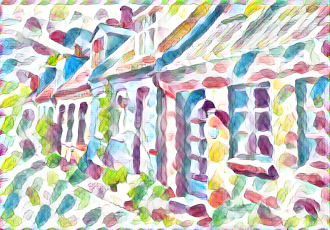

img


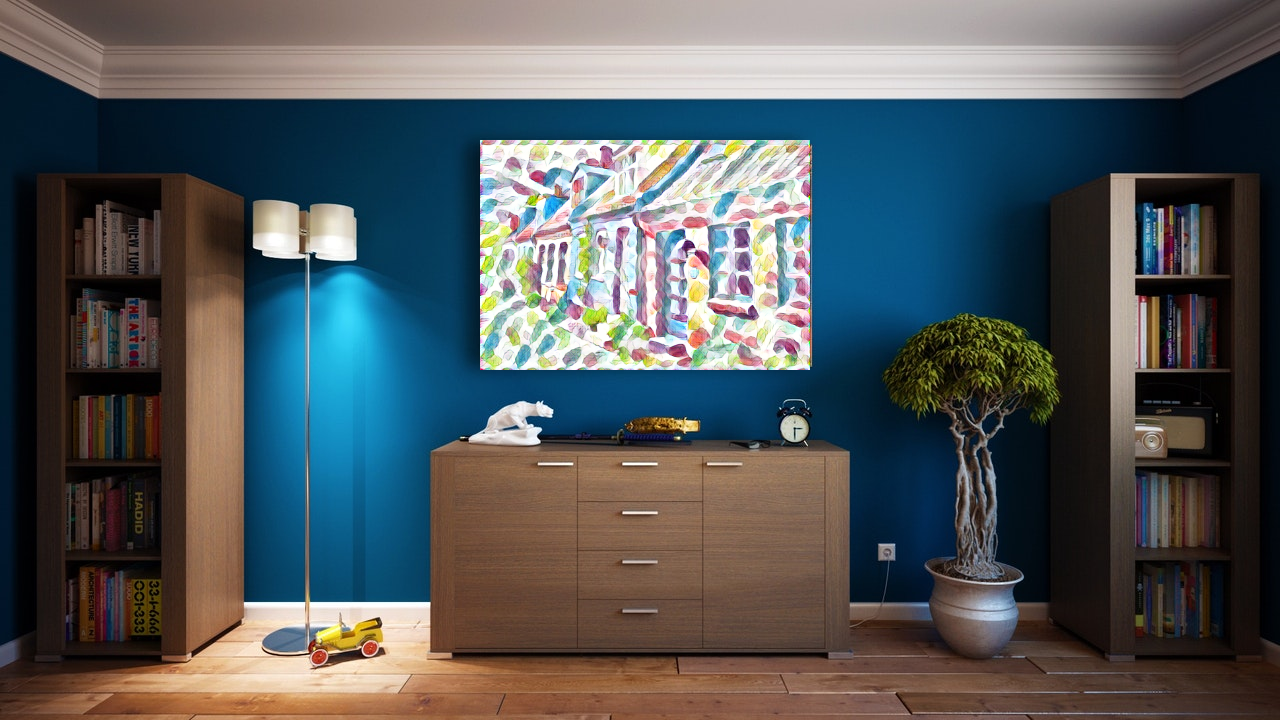

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

net = cv2.dnn.readNetFromTorch('models/instance_norm/feathers.t7')

img = cv2.imread('imgs/hw.jpg')##input이미지

cropped_img = img[140:370, 480:810]
# cropped_img로 blob 만들어 추론 -> output

##전처리
h, w, c = cropped_img.shape

cropped_img = cv2.resize(cropped_img, dsize=(500, int(h/w*500)))

MEAN_VALUE = [103.939, 116.779, 123.680]
blob = cv2.dnn.blobFromImage(cropped_img, mean=MEAN_VALUE)

print('blob.shape')
print(blob.shape)

## 추론결과 보기
net.setInput(blob)
output=net.forward()

output = output.squeeze().transpose((1, 2, 0))
output += MEAN_VALUE

output = np.clip(output, 0, 255)
output = output.astype('uint8')

## 이미지 합치기
output = cv2.resize(output, (w, h))
img[140:370, 480:810] = output


print('cropped_img')
cv2_imshow(output)
print('img')
cv2_imshow(img)
